# Linear Classifier - Softmax

https://maxpowerwastaken.github.io/blog/exploring-the-mnist-digits-dataset/

In [1]:
# All necessary imports at the beginning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.datasets import fetch_mldata       
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets.base import get_data_home

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load, explore and prepare dataset

The MNIST dataset is a classic Machine Learning dataset you can get it and more information about it from the website of [Yann Lecun](http://yann.lecun.com/exdb/mnist/). MNIST contains handwrittin digits and is split into a tranings set of 60000 examples and a test set of 10000 examples. You can use the module ```sklearn``` to load the MNIST dataset in a convenient way. 
easy load, mldata.org, orginal mnist, mnist link and description

In [3]:
mnist = fetch_mldata('MNIST original') #load MNIST
X, y = mnist["data"], mnist["target"] #separate images and labels

# shape of MNIST data
print('70000 images, each involving a 784 element array [70000 x 784]')
print('digits', X.shape) 
print('70000 labels for each image in the dataset [70000 x 1]')
print('labels',y.shape)

#datasets from sklearn:
#print(get_data_home())

70000 images, each involving a 784 element array [70000 x 784]
digits (70000, 784)
70000 labels for each image in the dataset [70000 x 1]
labels (70000,)


To get a visualization of MNIST we will plot a digit. Each line represents an image in flatten form (all pixel in a row). We have change the shape from a vector back to a matrix of the original shape to plot the image. In the case of MNIST this means a conversion of 784 pixel into 28x28 pixel. In addition we will check the label of that digit to verify it correspond to the image.

42203
label: 7.0


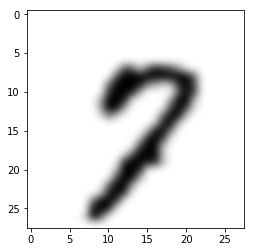

In [4]:
def plot_mnist_digit(digit):
    image = digit.reshape(28, 28)
    plt.imshow(image, cmap='binary', interpolation='bicubic')

#choose a random number, plot it and check label 
random_number = np.random.randint(1,60001)
print(random_number)
print('label:',y[random_number]) 
plot_mnist_digit(X[random_number])

In [5]:
def plot_bar_chart(y):    
    unique, counts = np.unique(y[:60000], return_counts=True)
    ax = plt.axes()
    plt.bar(unique, counts, width=0.7, align="center", color="green")
    labels = ["%d" % i for i in counts]
    rects = ax.patches
    plt.xticks(unique)
    plt.xlabel("Classes")
    plt.ylabel("Observations for class")
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 6, label,
                ha='center', va='bottom')
    plt.show()

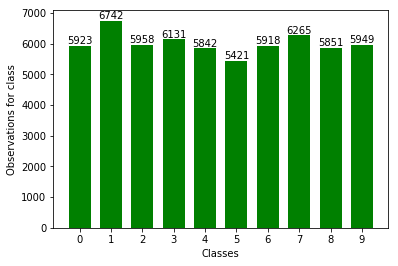

In [6]:
plot_bar_chart(y)

After a glimpse into MNIST let us explore it a bit further. Write a function ``` plot_mnist_digits(data, examples_each_row)``` that plots configurable number of examples for each class, like:
![MNIST Examples](images/MNIST_matrix.png)

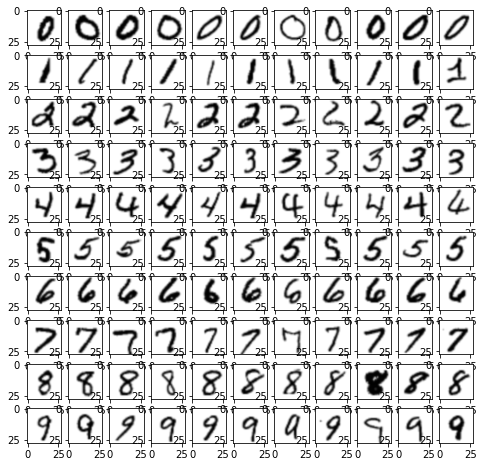

In [7]:
def plot_mnist_digits(data, examples_each_row):
    ############################################
    #TODO: Write a function that plots as many #    
    #      examples of each class as defiend   #
    #      by 'examples_each_row'              #
    ############################################
    
    #fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8,8))
    classes, indices = np.unique(y, return_index=True)
    num_classes = len(classes)
    fig = plt.figure(figsize=(8, 8))#
    plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=1.0)
    
    #ValueError: num must be 1 <= num <= 110, not 0
    for i in range(1, 111):
        #Create subplots for plotting images: 10,11,i)
        #Subplots ranges:  10 11 1 to 10 11 110
        fig.add_subplot(num_classes, examples_each_row, i)
        
        #Retrieve digit class 
        #Digit classes must be 10 for each class
        #cc is a number between 0 and 10
        cc = int((i-1)/11) 
        #Set dataset index to retrieve image from 
        #Label index from y values
        label_index = indices[cc]
        
        #How many -->(i-1)%num_classes: 0-9 numbers towards right
        random_number = int(np.random.randint(1,100))
        index_range = (i-1)%num_classes + random_number
        dataindex = label_index + index_range
        
        #Plot the image from X matrix at index "dataindex"
        plot_mnist_digit(data[dataindex])
    ############################################
    #             END OF YOUR CODE             #
    ############################################
    
plot_mnist_digits(X, examples_each_row=11)
plt.show() 

After exploring MNIST let us prepare the date for our linear classifier. First we need to separate traning and test data. Further we will shuffle the traning data to get a random distribution.  

In [8]:
# split data into training and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle training data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Define a linear classifier using Softmax

We will train a model to classify the MNIST dataset with the following equation:

$$ L = \frac{1}{M} \sum_{i=1}^{M} -log\; \left ( \frac{e^{h(x_j,\Theta)}}{\sum_{k=1}^{K}e^{h(x_k,\Theta)}} \right)_i + \frac{\lambda}{2} \sum_{}^{} \Theta^2, \: with \;\; h(X,\Theta) = X * \Theta $$

Using the universal equation for a loss function we can see the separate parts of that hugh equation.  

$$ L = \frac{1}{N} \sum_i L_i(h(x_i,\Theta),y_i) + \lambda R(\Theta)$$

We will implement each part on its own and put them together. That way it is much easier to understand whats going on. Let us start with the score function or hypothesis:

$$h(X,\Theta) = X * \Theta$$

It is possible to calculate all score values with one matrix multiplication ([dot product](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.dot.html)) so we can use the whole traning data $X$ instead of one digit $x_i$.

In [9]:
def class_scores(X,theta):
     ############################################
    #TODO: Implement the hypothesis and return #
    #      the score values for each class of  #
    #      every digit.                        #
    ############################################
    return np.dot(X, theta)
    ############################################
    #             END OF YOUR CODE             #
    ############################################

#Thetas should have dimension KxD
#X_train.shape == (60000, 784)
#theta.shape == (784,10)
#final matrix == (60000, 10) - for each image it stores the corresponding score for each class
K = 10
D = 28*28 # X_train.shape[1]
theta = np.random.rand(D,K)
scores = class_scores(X_train, theta) #(60000, 10)
print(scores)

After we can define the data loss funtion $L_i$. We assume the score values are unnormalized log probabilities and we use the softmax function to calculate probabilities.
$$ P(Y=j\mid X=x_i) = \frac{e^{s_j}}{\sum_{k=1}^{K}e^{s_k}} $$
$$ L_i = -log\;P(Y=j\mid X=x_i) $$

Hint: If the correct classes (labels) are in a [one hot encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) shape you can use a matrix multiplication to extract the correct class. 

In [10]:
# Support function to convert label vector into a one hot encoding matrix
def onehot_encode_label(label):
    #S_i*[1 oder 0 abhaengig von der Klasse]
    onehot_encoder = OneHotEncoder(sparse=False)
    label = label.reshape(len(label), 1)
    onehot_encoded_label = onehot_encoder.fit_transform(label)
    return onehot_encoded_label

# Calculate class probability distribution for each digit from given class scores
def softmax(class_scores):
    ############################################
    #TODO: Use the softmax function to compute #
    #      class probabilties                  #
    ############################################
    #Stable version --> no nan values
    #shiftx = class_scores - np.max(class_scores)
    #exps = np.exp(shiftx)
    #result = exps / np.sum(exps)
    #return result

    exp_scores = np.exp(class_scores)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

 
    ############################################
    #             END OF YOUR CODE             #
    ############################################

# Compute data_loss L_i for the correct class
def data_loss(class_probabilities, onehot_encode_label):
    ############################################
    #TODO: With hot encoded labels and class   #
    #      probabilties calculate data loss    #
    #      L_i                                 #
    ############################################
    #np.log(class_probabilities) --> the whole matrix has the same value for L_i
    #onehot_encode_label --> [1,0,0, ..., 0]
    #--> At the End the loss is set only where the matrix contains 1
    return -1.0*(np.log(class_probabilities)*onehot_encode_label)
    ############################################
    #             END OF YOUR CODE             #
    ############################################
    

Now we will calculate loss $L$ using the defined functions. 

$$ L = \frac{1}{M} \sum_i L_i(h(x_i,\Theta),y_i) + \lambda R(\Theta)$$

Besides the loss L we will have to calculate the gradient for our loss function $L$. To minimize our loss we will need the gradient. For more information about the gradient you can use additional sources, like that good [blog post](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/).

Other source: [DeepNotes](https://deepnotes.io/softmax-crossentropy) and [content](https://houxianxu.github.io/2015/04/23/logistic-softmax-regression/)

Formula for Gradient:

$\nabla_{w_j} = \frac{e^{w_j^Tx^{(i)}}} {\sum_{j = 1}^k e^{w_j^Tx^{(i)}}} x^{(i)}$

In [11]:
def loss(X, y, theta, lam):
    encoded_labels = onehot_encode_label(y)           # also needed for the gradient, therefore separated calculated
    probabilities = softmax(class_scores(X,theta))    # also needed for the gradient, therefore separated calculated
    #print("Probabilities: ", probabilities)
    loss_Li = data_loss(probabilities,encoded_labels) 
    
    m = X.shape[0]  # number of training data for normalization
    l2_regularization = (lam/2)*np.sum(theta*theta)   # regularization loss L2 Tikhonov/Wissenrepr.
  
    
    ############################################
    #TODO: Put everthing together and calculte #
    #      loss L and gradient dL with given   #
    #      variables.                          #
    ############################################
    #Compute loss
    loss = np.sum(loss_Li)/m + l2_regularization

    #Derivative
    #https://deepnotes.io/softmax-crossentropy
    #Derivative: p_i(d_i_j - p_j) --> p_i - y_i (y_i is one hot encoded vector)
    
    scores = probabilities
    scores -= encoded_labels
    scores /= m
    
    #See Blog post/content
    #Calculate scores separately, otherwise nan
    gradient = np.dot(X.T, scores) + (l2_regularization * theta) #Apply regularization
 
    ############################################
    #             END OF YOUR CODE             #
    ############################################
    
    return loss, gradient

In [12]:
K = 10
D = 28*28 # X_train.shape[1]
theta = 0.001 * np.random.randn(D,K)
l = loss(X_train, y_train, theta, 10)
print("Loss: ", l[0])

Loss:  5.203325226889517


## Reduce the cost using gradient descent

In [14]:
def gradient_descent(traning_data, traning_label, theta, lam=0.5, iterations=100, learning_rate=1e-5):
    losses = []
    ############################################
    #TODO: Optimize loss with gradient descent #
    #      update rule. Return a final model   #
    #      and a history of loss values.       #
    ############################################
    for i in range(0,iterations):
        (l, gr) = loss(traning_data, traning_label, theta, lam)
        #Stores loss in the history
        losses.append(l)
        #Update thetas
        #nan values!
        #temp_thetas = theta - (learning_rate*gr)
        #theta += temp_thetas
        #-learning_rate --> positiver bereich
        #+ learning_rate --> negativer bereich
        theta += -learning_rate * gr
    ############################################
    #             END OF YOUR CODE             #
    ############################################
    print("End of iterations")
    return theta, losses

# Initialize learnable parameters theta 
theta = np.zeros([X_train.shape[1],len(np.unique(y_train))])
# Start optimization with traning data, theta and optional hyperparameters
opt_model, loss_history = gradient_descent(X_train,y_train,theta,iterations=250)

End of iterations


## Evaluate model
Let us look at the optimization results. Final loss tells us how far we could reduce costs during traning process. Further we can use the first loss value as a sanity check and validate our implementation of the loss function works as intended. Recall loss value after first iteration should be $ log\:c$ with $c$ being number of classes. To visulize the whole tranings process we can plot losss values from each iteration as a loss curve. 

last iteration loss: 0.32865812263228605
first iteration loss: 2.302585092994044


Text(0.5, 0, 'iterations')

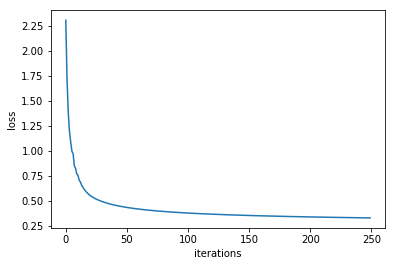

In [15]:
# check loss after last iteration
print('last iteration loss:',loss_history[-1])
# Sanity check: first loss should be ln(10)
print('first iteration loss:',loss_history[0])
# Plot a loss curve
plt.plot(loss_history)
plt.ylabel('loss')
plt.xlabel('iterations')

Evaluation above gave us some inside about the optimization process but did not quantified our final model. One possibility is to calculate model accuracy.

In [16]:
def modelAccuracy(X,y,theta):
    # calculate probabilities for each digit
    probabilities = softmax(np.dot(X,theta))
    # class with highest probability will be predicted
    prediction = np.argmax(probabilities,axis=1)
    # Sum all correct predictions and divied by number of data
    accuracy = (sum(prediction == y))/X.shape[0]
    return accuracy

print('Training accuracy: ', modelAccuracy(X_train,y_train,opt_model))
print('Test accuracy: ', modelAccuracy(X_test,y_test,opt_model))

Training accuracy:  0.9093833333333333
Test accuracy:  0.9131


But that quantification is limited. A more gerenell approach is to calculate a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) and get different model measurements from it. A good overview for model measurements is provided by the wikipedia article of [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall). We implement a confusion matrix for our model and calculate a [F1 score](https://en.wikipedia.org/wiki/F1_score) and ```print()``` it.

Method ```perf_measure``` from this [article](https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python)

In [17]:
#Credits: 
#https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
    return(TP, FP, TN, FN)
    

def confusionMatrix(X,y,theta):
    ############################################
    #TODO: Calculate a confusion matrix for    # 
    #      and it.                             #
    ############################################
   # calculate probabilities for each digit
    probabilities = softmax(np.dot(X,theta))
    # class with highest probability will be predicted
    prediction = np.argmax(probabilities,axis=1)
    #Get values
    TP, FP, FN, TN = perf_measure(y, prediction)
    conf_matrix = [[TP,FP],[FN, TN]]
    return conf_matrix
    
    ############################################
    #             END OF YOUR CODE             #
    ############################################
    
def f1Score(confMatrix):
    ############################################
    #TODO: Calculate a F1 score from a given   #
    #      confusion matrix.                   #
    ############################################
    return (2*confMatrix[0][0]/(2*confMatrix[0][1] 
                                + confMatrix[0][1] 
                                + confMatrix[1][0]))
    ############################################
    #             END OF YOUR CODE             #
    ############################################ 

In [20]:
print("[[TP, FP],    [FN, TN]]")
print(confusionMatrix(X_test,y_test,theta))

print("F1 score: ", f1Score(confusionMatrix(X,y,theta)))

[[TP, FP],    [FN, TN]]
[[1106, 46], [957, 58]]
F1 score:  1.8935483870967742


Interesting is to plot a part of $theta$, because you can visualize the learned templates for each class.

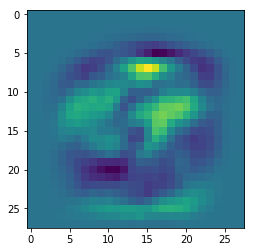

In [25]:
plt.imshow(np.reshape(opt_model[:,9],[28,28]))